In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import markers

x:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
y
 [0 1 1 0]


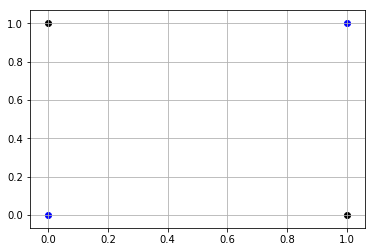

y
 [[0]
 [1]
 [1]
 [0]]


In [2]:
x = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
print('x:\n', x)
y = np.bitwise_xor(x.T[0], x.T[1])
print('y\n', y)

plt.figure()
plt.scatter(x[:, 0][y==1], x[:,1][y==1], c='k')
plt.scatter(x[:, 0][y==0], x[:,1][y==0], c='b')
plt.grid()
plt.show()

# need to sync shape
y = y.reshape(-1, 1)
print('y\n', y)

[array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32), array([[0.00554287],
       [0.00091715]], dtype=float32), array([-0.0038304], dtype=float32), array([[0.49904245],
       [0.4992717 ],
       [0.50042814],
       [0.5006574 ]], dtype=float32)]


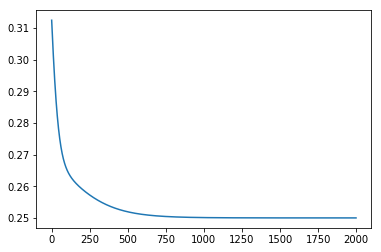

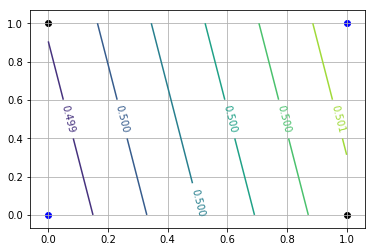

In [3]:
# Clears the default graph stack and resets the global default graph.
tf.reset_default_graph()

# place holder for inputs (input node)
tf_x = tf.placeholder(dtype=tf.float32, shape=[None, 2], name='tf_x')
tf_y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='tf_y')

# variable for parameters (variables node)
tf_w = tf.get_variable(dtype=tf.float32, shape=[2, 1], name='w', initializer=tf.random_uniform_initializer(-1, 1))
tf_b = tf.get_variable(dtype=tf.float32, shape=[1], name='b', initializer=tf.random_uniform_initializer(-1, 1))

# computation graph (node)
tf_o1 = tf.matmul(tf_x, tf_w) + tf_b
# tf_x @ tf_w + tf_b
tf_a1 = tf.nn.sigmoid(tf_o1)
tf_output = tf_a1

tf_loss = tf.reduce_sum(tf.losses.mean_squared_error(labels=tf_y, predictions=tf_output))

# optimizer (backprop operation)
opt = tf.train.GradientDescentOptimizer(learning_rate=1e-1)
opt_op = opt.minimize(tf_loss, var_list=[tf_w, tf_b])


# Start Computation Flow
with tf.Session() as sess:
    x_ = np.float32(x)
    y_ = np.float32(y)
    # graph weight initialize
    tf.global_variables_initializer().run()
    
    # Training
    losses = []
    for i in range(2000):
        _, loss = sess.run([opt_op, tf_loss], feed_dict={'tf_x:0':x_, 'tf_y:0':y_})
        losses.append(loss)
    
    # Test (Result)
    output = sess.run([tf_x, tf_y, tf_w, tf_b, tf_output], feed_dict={'tf_x:0':x_, 'tf_y:0':y_})
    print(output)

    x_plot = np.linspace(0, 1, 3)
    x1, x2 = np.meshgrid(x_plot, x_plot)
    xs = np.concatenate((x1.reshape(-1, 1), x2.reshape(-1, 1)), 1)
    zs = sess.run(tf_output, feed_dict={'tf_x:0':xs})
    z = zs.reshape((3, 3))
    
    plt.figure()
    plt.plot(losses)
    plt.show()
    
    plt.figure()
    plt.scatter(x[:,0][y[:,0]==1], x[:,1][y[:,0]==1], c='k')
    plt.scatter(x[:,0][y[:,0]==0], x[:,1][y[:,0]==0], c='b')
    plt.clabel(plt.contour(x1, x2, z), inline=1, fontsize=10)    
    idx = np.array([2, 1, 0])
    plt.grid()
    plt.show()

[array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32), array([[0.03367162],
       [0.9654539 ],
       [0.96684784],
       [0.03382737]], dtype=float32), 0.0011426418]


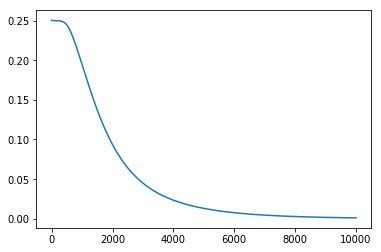

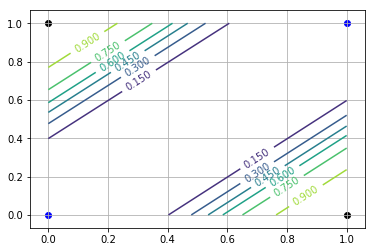

In [20]:
# Clears the default graph stack and resets the global default graph.
tf.reset_default_graph()

# place holder for inputs (input node)
tf_x = tf.placeholder(dtype=tf.float32, shape=[None, 2], name='tf_x')
tf_y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='tf_y')

# variable for parameters (variables node)
tf_w1 = tf.get_variable(dtype=tf.float32, shape=[2, 2], name='w1', initializer=tf.random_normal_initializer())
tf_b1 = tf.get_variable(dtype=tf.float32, shape=[2], name='b1', initializer=tf.initializers.zeros)
tf_w2 = tf.get_variable(dtype=tf.float32, shape=[2, 1], name='w2', initializer=tf.random_normal_initializer())
tf_b2 = tf.get_variable(dtype=tf.float32, shape=[1], name='b2', initializer=tf.initializers.zeros)

# computation graph (node)
tf_o1 = tf.matmul(tf_x, tf_w1) + tf_b1
tf_a1 = tf.nn.sigmoid(tf_o1)
tf_o2 = tf.matmul(tf_a1, tf_w2) + tf_b2
tf_a2 = tf.nn.sigmoid(tf_o2)

tf_output = tf_a2
tf_loss = tf.reduce_sum(tf.losses.mean_squared_error(labels=tf_y, predictions=tf_output))

# optimizer (backprop operation)
# opt = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
opt = tf.train.AdamOptimizer(learning_rate=1e-3)
opt_op = opt.minimize(tf_loss, var_list=[tf_w1, tf_b1, tf_w2, tf_b2])

# Start Computation Flow
with tf.Session() as sess:
    x_ = np.float32(x)
    y_ = np.float32(y)
    # graph weight initialize
    tf.global_variables_initializer().run()
    # Training
    losses = []
    for i in range(10000):
        _, loss = sess.run([opt_op, tf_loss], feed_dict={'tf_x:0':x_, 'tf_y:0':y_})
        losses.append(loss)
    # Test (Result)
    output = sess.run([tf_x, tf_y, tf_output, tf_loss], feed_dict={'tf_x:0':x_, 'tf_y:0':y_})
    print(output)

    x_plot = np.linspace(0, 1, 11)
    x1, x2 = np.meshgrid(x_plot, x_plot)
    xs = np.concatenate((x1.reshape(-1, 1), x2.reshape(-1, 1)), 1)

    o1s, o2s = sess.run([tf_a1, tf_a2], feed_dict={'tf_x:0':xs})

    zs = o2s
    z = zs.reshape((11, 11))
    idx = np.array([2, 1, 0])

    plt.figure()
    plt.plot(losses)
    plt.show()

    plt.figure()
    plt.scatter(x[:,0][y[:,0]==1], x[:,1][y[:,0]==1], c='k')
    plt.scatter(x[:,0][y[:,0]==0], x[:,1][y[:,0]==0], c='b')
    plt.clabel(plt.contour(x1, x2, z), inline=1, fontsize=10)    
    plt.grid()
    plt.show()

# Reference Site
http://playground.tensorflow.org/